# Part 1 - Import Libraries & Data

In [192]:
!pip install folium
!pip install geopandas

                                              0.0/1.1 MB ? eta -:--:--
     ---                                      0.1/1.1 MB 5.8 MB/s eta 0:00:01
     --------                                 0.2/1.1 MB 2.9 MB/s eta 0:00:01
     ---------------                          0.4/1.1 MB 3.4 MB/s eta 0:00:01
     ----------------------                   0.6/1.1 MB 3.6 MB/s eta 0:00:01
     ---------------------------              0.8/1.1 MB 3.4 MB/s eta 0:00:01
     ----------------------------------       1.0/1.1 MB 3.6 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 3.5 MB/s eta 0:00:00
                                              0.0/22.9 MB ? eta -:--:--
                                              0.2/22.9 MB 5.3 MB/s eta 0:00:05
                                              0.4/22.9 MB 4.6 MB/s eta 0:00:05
                                              0.6/22.9 MB 3.8 MB/s eta 0:00:06
     -                                        0.7/22.9 MB 3.9 MB/s eta 0:0

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import plotly
import plotly.express as px

In [124]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline 

In [125]:
# Import ".json" file for the U.S. 

country_geo = r'C:/Users/mrtak/10-2023 City Bike Analysis/us-states.json'

In [127]:
city_geo_2 = r'C:/Users/mrtak/10-2023 City Bike Analysis/nyc-zip-code-tabulation-areas-polygons.geojson'

In [128]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:/Users/mrtak/10-2023 City Bike Analysis/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [ ]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:/Users/mrtak/10-2023 City Bike Analysis/nyc-zip-code-tabulation-areas-polygons.geojson',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

In [ ]:
country_geo

In [ ]:
city_geo

In [ ]:
city_geo_2

In [ ]:
# Define path

path = r'C:/Users/mrtak/10-2023 City Bike Analysis/'

In [ ]:
#import citibikes data

df = pd.read_csv(r'C:/Users/mrtak/10-2023 City Bike Analysis/city_02.csv')

In [ ]:
df.head()

In [ ]:
#drop Unnamed: 0
df = df.drop(columns = ['Unnamed: 0'])

In [132]:
df['ride_start']=pd.to_datetime(df['ride_start'],infer_datetime_format=True)
df['ride_end']=pd.to_datetime(df['ride_end'],infer_datetime_format=True)

In [133]:
df['ride_start_date'] = df['ride_start'].dt.date
df['ride_start_time'] = df['ride_start'].dt.time

In [134]:
df.shape

(42991, 21)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42991 entries, 0 to 42990
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42991 non-null  int64         
 1   day_of_week              42991 non-null  object        
 2   start_hour               42991 non-null  int64         
 3   start_station_id         42991 non-null  int64         
 4   start_station_name       42991 non-null  object        
 5   start_station_latitude   42991 non-null  float64       
 6   start_station_longitude  42991 non-null  float64       
 7   end_station_id           42991 non-null  int64         
 8   end_station_name         42991 non-null  object        
 9   end_station_latitude     42991 non-null  float64       
 10  end_station_longitude    42991 non-null  float64       
 11  trip_duration            42991 non-null  int64         
 12  subscriber               42991 n

In [136]:
df.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,time of day,age group,ride_start_date,ride_start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,evening,Generation X,2013-09-09,18:18:55
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,evening,Millennials,2013-09-12,18:38:53
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,evening,Millennials,2013-09-18,19:44:04
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,mid-day,Millennials,2013-09-28,11:54:37
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,night,Millennials,2013-09-27,22:01:01


# Part 2 - Data Type

## Missing Value Check

In [137]:
# check missing values

#Check for missing values
df.isnull().sum()

Unnamed: 0                 0
day_of_week                0
start_hour                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
ride_start                 0
ride_end                   0
time of day                0
age group                  0
ride_start_date            0
ride_start_time            0
dtype: int64

## Duplicate Check

In [138]:
# Check for full duplicates
df_dups = df[df.duplicated()]

In [139]:
df_dups

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,time of day,age group,ride_start_date,ride_start_time


In [140]:
#Create new df_nd without duplicates
df_nd = df.drop_duplicates()

In [141]:
df.shape

(42991, 21)

## Extreme Values Check

<Axes: xlabel='trip_duration', ylabel='Count'>

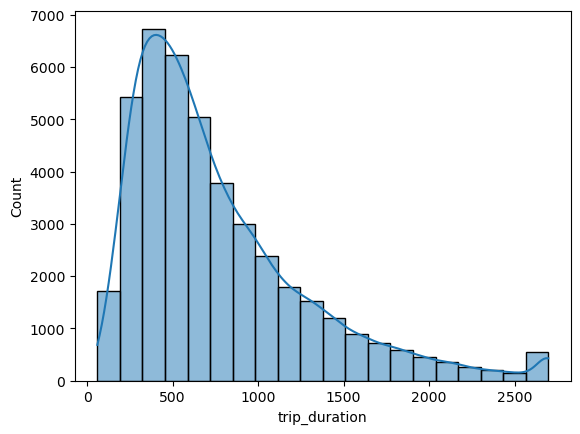

In [142]:
sns.histplot(df['trip_duration'], bins=20, kde = True) # shows extreme values for 'trip_duration'

In [143]:
# Check how many extreme values

df[df['trip_duration'] >2500]

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,time of day,age group,ride_start_date,ride_start_time
206,206,Sat,3,157,Henry St & Atlantic Ave,40.690893,-73.996123,143,Clinton St & Joralemon St,40.692395,...,2697,Subscriber,1990.0,1,2013-09-14 03:25:36,2013-09-14 10:26:07,early morning,Millennials,2013-09-14,03:25:36
299,299,Tue,17,492,W 33 St & 7 Ave,40.750200,-73.990931,157,Henry St & Atlantic Ave,40.690893,...,2658,Subscriber,1978.0,1,2013-09-03 17:32:29,2013-09-03 18:16:47,evening,Generation X,2013-09-03,17:32:29
475,475,Fri,8,301,E 2 St & Avenue B,40.722174,-73.983688,151,Cleveland Pl & Spring St,40.721816,...,2697,Subscriber,1987.0,2,2013-09-27 08:01:32,2013-09-27 10:27:55,morning,Millennials,2013-09-27,08:01:32
546,546,Fri,14,264,Maiden Ln & Pearl St,40.707065,-74.007319,352,W 56 St & 6 Ave,40.763406,...,2697,Subscriber,1988.0,1,2013-09-20 14:11:01,2013-09-20 14:58:51,mid-day,Millennials,2013-09-20,14:11:01
620,620,Sat,12,459,W 20 St & 11 Ave,40.746745,-74.007756,459,W 20 St & 11 Ave,40.746745,...,2697,Subscriber,1960.0,2,2013-09-14 12:35:08,2013-09-14 13:20:35,mid-day,Baby Boomers,2013-09-14,12:35:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42486,42486,Fri,21,457,Broadway & W 58 St,40.766953,-73.981693,336,Sullivan St & Washington Sq,40.730477,...,2696,Subscriber,1966.0,1,2013-09-06 21:10:42,2013-09-06 21:55:38,night,Generation X,2013-09-06,21:10:42
42718,42718,Sun,17,412,Forsyth St & Canal St,40.715815,-73.994224,441,E 52 St & 2 Ave,40.756014,...,2697,Subscriber,1976.0,2,2013-09-15 17:49:06,2013-09-15 18:40:32,evening,Generation X,2013-09-15,17:49:06
42835,42835,Sun,18,448,W 37 St & 10 Ave,40.756604,-73.997901,514,12 Ave & W 40 St,40.760875,...,2697,Subscriber,1990.0,2,2013-09-08 18:32:27,2013-09-08 19:22:58,evening,Millennials,2013-09-08,18:32:27
42901,42901,Sun,16,242,Flushing Ave & Carlton Ave,40.697883,-73.973503,526,E 33 St & 5 Ave,40.747659,...,2697,Subscriber,1965.0,1,2013-09-22 16:10:00,2013-09-22 17:25:53,evening,Generation X,2013-09-22,16:10:00


In [144]:
# Clean extreme values
df = df[df['trip_duration'] < 2500] 

In [145]:
df.shape

(42369, 21)

In [146]:
station_counts = df.groupby('start_station_id')['ride_start_date'].count().reset_index()

In [147]:
#how many rides occured at that station
station_counts

,start_station_id,ride_start_date
0,72,155
1,79,118
2,82,59
3,83,70
4,116,267
...,...,...
325,2017,88
326,2021,148
327,2022,95
328,2023,73


In [148]:
#how many rides happened each day at each station
station_counts_day = df.groupby(['start_station_id', 'day_of_week'])['ride_start_date'].count()

In [149]:
station_counts_day.head(20)

start_station_id  day_of_week
72                Fri            30
                  Mon            23
                  Sat            21
                  Sun            25
                  Thu            21
                  Tue            16
                  Wed            19
79                Fri            22
                  Mon            15
                  Sat            13
                  Sun            10
                  Thu            21
                  Tue            16
                  Wed            21
82                Fri             6
                  Mon            12
                  Sat             6
                  Sun            11
                  Thu             6
                  Tue             8
Name: ride_start_date, dtype: int64

In [150]:
station_counts.max()

start_station_id    3002
ride_start_date      470
dtype: int64

In [151]:
station_counts.min()

start_station_id    72
ride_start_date      3
dtype: int64

In [152]:
station_counts.mean()

start_station_id    447.809091
ride_start_date     128.390909
dtype: float64

<Axes: ylabel='Count'>

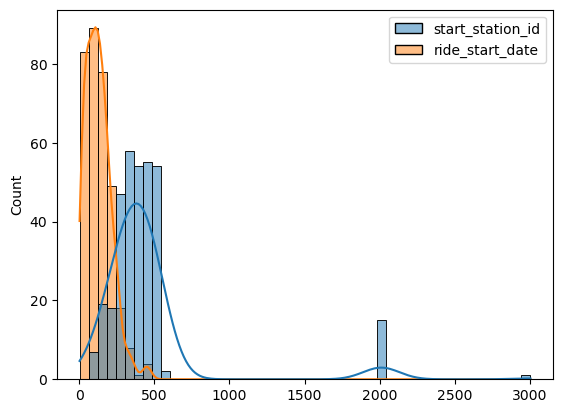

In [153]:
#looking into station counts
sns.histplot(station_counts, bins=50, kde = True) 

In [154]:
# select only needed columns
columns = ["day_of_week","start_hour","start_station_id","start_station_longitude","start_station_latitude","ride_start_date"]


In [155]:
citi_1 = df[columns]

In [156]:
citi_1.head()

,day_of_week,start_hour,start_station_id,start_station_longitude,start_station_latitude,ride_start_date
0,Mon,18,523,-73.991382,40.754666,2013-09-09
1,Thu,18,257,-74.002472,40.719392,2013-09-12
2,Wed,19,479,-73.991255,40.760193,2013-09-18
3,Sat,11,527,-73.974347,40.743156,2013-09-28
4,Fri,22,293,-73.990765,40.730287,2013-09-27


In [157]:
type(citi_1)

pandas.core.frame.DataFrame

In [158]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42369 entries, 0 to 42990
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day_of_week              42369 non-null  object 
 1   start_hour               42369 non-null  int64  
 2   start_station_id         42369 non-null  int64  
 3   start_station_longitude  42369 non-null  float64
 4   start_station_latitude   42369 non-null  float64
 5   ride_start_date          42369 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.3+ MB


In [159]:
# Check for missing values

citi_1.isnull().sum()

day_of_week                0
start_hour                 0
start_station_id           0
start_station_longitude    0
start_station_latitude     0
ride_start_date            0
dtype: int64

In [161]:
df['ride_start_date']=pd.to_datetime(df['ride_start_date'],infer_datetime_format=True)
citi_1['ride_start_date']=pd.to_datetime(citi_1['ride_start_date'],infer_datetime_format=True)

C:\Users\mrtak\AppData\Local\Temp\ipykernel_9532\1847117091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citi_1['ride_start_date']=pd.to_datetime(citi_1['ride_start_date'],infer_datetime_format=True)


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42369 entries, 0 to 42990
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42369 non-null  int64         
 1   day_of_week              42369 non-null  object        
 2   start_hour               42369 non-null  int64         
 3   start_station_id         42369 non-null  int64         
 4   start_station_name       42369 non-null  object        
 5   start_station_latitude   42369 non-null  float64       
 6   start_station_longitude  42369 non-null  float64       
 7   end_station_id           42369 non-null  int64         
 8   end_station_name         42369 non-null  object        
 9   end_station_latitude     42369 non-null  float64       
 10  end_station_longitude    42369 non-null  float64       
 11  trip_duration            42369 non-null  int64         
 12  subscriber               42369 n

In [163]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42369 entries, 0 to 42990
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   day_of_week              42369 non-null  object        
 1   start_hour               42369 non-null  int64         
 2   start_station_id         42369 non-null  int64         
 3   start_station_longitude  42369 non-null  float64       
 4   start_station_latitude   42369 non-null  float64       
 5   ride_start_date          42369 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 2.3+ MB


In [169]:
# Calculate rides per day for each station
station_daily_counts = df.groupby(['start_station_id', df['ride_start_date'].dt.date])['ride_start_date'].count()

In [170]:
#rides taken each day at each station
station_daily_counts

start_station_id  ride_start_date
72                2013-09-02          3
                  2013-09-03          1
                  2013-09-04          4
                  2013-09-05          8
                  2013-09-06          9
                                     ..
3002              2013-09-26          9
                  2013-09-27          7
                  2013-09-28         12
                  2013-09-29          6
                  2013-09-30          3
Name: ride_start_date, Length: 8641, dtype: int64

In [171]:
station_daily_counts.head(35)

start_station_id  ride_start_date
72                2013-09-02         3
                  2013-09-03         1
                  2013-09-04         4
                  2013-09-05         8
                  2013-09-06         9
                  2013-09-07         6
                  2013-09-08         7
                  2013-09-09         5
                  2013-09-10         7
                  2013-09-11         7
                  2013-09-12         7
                  2013-09-13         7
                  2013-09-14         6
                  2013-09-15         8
                  2013-09-16         4
                  2013-09-17         4
                  2013-09-19         1
                  2013-09-20         6
                  2013-09-21         5
                  2013-09-22         5
                  2013-09-23         6
                  2013-09-24         4
                  2013-09-25         8
                  2013-09-26         5
                  2013-09-27  

In [172]:
# average rides per day by start station
station_avg_rides_per_day = station_daily_counts.groupby('start_station_id').mean().reset_index()

In [173]:
#checking code
station_avg_rides_per_day

,start_station_id,ride_start_date
0,72,5.535714
1,79,4.370370
2,82,2.185185
3,83,2.500000
4,116,8.900000
...,...,...
325,2017,2.933333
326,2021,5.285714
327,2022,3.275862
328,2023,3.173913


In [174]:
#changing column name
station_avg_rides_per_day= station_avg_rides_per_day.rename(columns={'ride_start_date':'average_daily_rides'})

In [175]:
#merging data sets
citi_1.head()

,day_of_week,start_hour,start_station_id,start_station_longitude,start_station_latitude,ride_start_date
0,Mon,18,523,-73.991382,40.754666,2013-09-09
1,Thu,18,257,-74.002472,40.719392,2013-09-12
2,Wed,19,479,-73.991255,40.760193,2013-09-18
3,Sat,11,527,-73.974347,40.743156,2013-09-28
4,Fri,22,293,-73.990765,40.730287,2013-09-27


In [176]:
station_avg_rides_per_day.head()

,start_station_id,average_daily_rides
0,72,5.535714
1,79,4.370370
2,82,2.185185
3,83,2.500000
4,116,8.900000


In [177]:
station_avg_rides_per_day.shape

(330, 2)

In [178]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

In [181]:
# lat and long for each station
station_loc = citi_1.groupby('start_station_id')[['start_station_latitude', 'start_station_longitude']].mean()

In [182]:
station_loc

,start_station_latitude,start_station_longitude
start_station_id,,
72,40.767272,-73.993929
79,40.719116,-74.006667
82,40.711174,-74.000165
83,40.683826,-73.976323
116,40.741776,-74.001497
...,...,...
2017,40.750224,-73.971214
2021,40.759291,-73.988597
2022,40.758491,-73.959206


In [183]:
# each station with lat and longitude and avg daily rides
df_merged = station_loc.merge(station_avg_rides_per_day, on = 'start_station_id')

In [184]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.535714
1,79,40.719116,-74.006667,4.370370
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.500000
4,116,40.741776,-74.001497,8.900000
...,...,...,...,...
325,2017,40.750224,-73.971214,2.933333
326,2021,40.759291,-73.988597,5.285714
327,2022,40.758491,-73.959206,3.275862
328,2023,40.759681,-73.970314,3.173913


In [185]:
data_to_plot = df_merged[['start_station_id','average_daily_rides',]]
data_to_plot.head()

,start_station_id,average_daily_rides
0,72,5.535714
1,79,4.370370
2,82,2.185185
3,83,2.500000
4,116,8.900000


In [186]:
data_to_plot_1 = df_merged[['start_station_longitude','start_station_latitude','average_daily_rides',]]
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.535714
1,-74.006667,40.719116,4.370370
2,-74.000165,40.711174,2.185185
3,-73.976323,40.683826,2.500000
4,-74.001497,40.741776,8.900000


In [187]:
df_merged['average_daily_rides'].max()

15.666666666666666

In [188]:
df_merged['average_daily_rides'].mean()

4.550304044867873

<Axes: xlabel='average_daily_rides', ylabel='Count'>

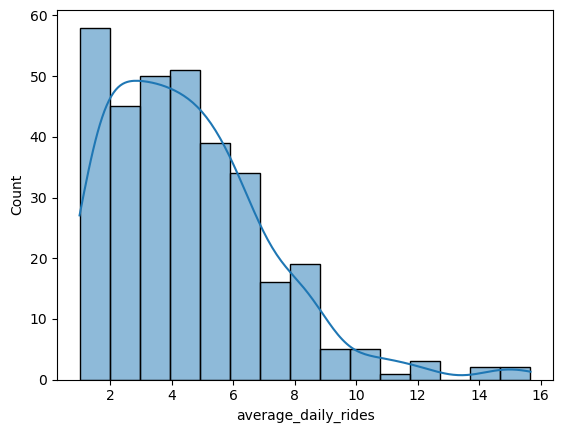

In [189]:
#AVG DAILY RIDES BINS
sns.histplot(df_merged['average_daily_rides'], bins=15, kde = True)

In [190]:

nyc_map

# 3 Create Chloropath Maps

## Folium Map Bike Duration Each Station

In [193]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [198]:
data_to_plot_1.head()

,start_station_longitude,start_station_latitude,average_daily_rides
0,-73.993929,40.767272,5.535714
1,-74.006667,40.719116,4.370370
2,-74.000165,40.711174,2.185185
3,-73.976323,40.683826,2.500000
4,-74.001497,40.741776,8.900000


In [199]:
data_to_plot_2= df_merged[['start_station_longitude','start_station_latitude']]

In [200]:
data_to_plot_2.head()

,start_station_longitude,start_station_latitude
0,-73.993929,40.767272
1,-74.006667,40.719116
2,-74.000165,40.711174
3,-73.976323,40.683826
4,-74.001497,40.741776


In [201]:
# trying to get a NYC map imported and the lat and long of the zip codes
import folium
from folium.plugins import MarkerCluster

In [202]:
map_zip = folium.Map(location=[40.693943, -73.985880], default_zoom_start=12)

In [203]:
choropleth_layer = folium.Choropleth(
    geo_data=city_geo_2,
    name="Choropleth Map"
).add_to(map_zip)

In [204]:
folium.LayerControl().add_to(map_zip)

In [205]:

map_zip

In [206]:
df_merged

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,72,40.767272,-73.993929,5.535714
1,79,40.719116,-74.006667,4.370370
2,82,40.711174,-74.000165,2.185185
3,83,40.683826,-73.976323,2.500000
4,116,40.741776,-74.001497,8.900000
...,...,...,...,...
325,2017,40.750224,-73.971214,2.933333
326,2021,40.759291,-73.988597,5.285714
327,2022,40.758491,-73.959206,3.275862
328,2023,40.759681,-73.970314,3.173913


In [125]:
# Setup a folium map at a high-level zoom
map04 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_birth_year_mean,
    columns = ['start_station_name', 'birth_year'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Average Birth Year").add_to(map04)
folium.LayerControl().add_to(map04)

In [207]:
df_merged = pd.read_csv(r'C:/Users/mrtak/10-2023 City Bike Analysis/bike_station.csv')

In [208]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="lightgreen", icon="bicycle")
    ).add_to(map_zip)

In [209]:
# Add a layer control
folium.LayerControl().add_to(map_zip)

In [210]:
map_zip

In [211]:
import folium
import geopandas as gpd
from shapely.geometry import Point

In [212]:
area_geojson = r'C:/Users/mrtak/10-2023 City Bike Analysis/nyc-zip-code-tabulation-areas-polygons.geojson'

In [213]:
geojson_gdf = gpd.read_file(area_geojson)

In [214]:
# Convert bike station DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_merged["start_station_longitude"], df_merged["start_station_latitude"])]
bike_stations_gdf = gpd.GeoDataFrame(df_merged, geometry=geometry, crs=geojson_gdf.crs)

In [215]:
merged_gdf = gpd.sjoin(bike_stations_gdf, geojson_gdf, predicate="within")

In [216]:
merged_gdf

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,geometry,index_right,OBJECTID,postalCode,PO_NAME,STATE,borough,ST_FIPS,CTY_FIPS,BLDGpostalCode,Shape_Leng,Shape_Area,@id
0,0,72,40.767272,-73.993929,5.642857,POINT (-73.99393 40.76727),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
24,24,173,40.760647,-73.984427,5.233333,POINT (-73.98443 40.76065),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
75,75,281,40.764397,-73.973715,5.300000,POINT (-73.97371 40.76440),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
138,138,352,40.763406,-73.977225,5.500000,POINT (-73.97722 40.76341),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
202,202,422,40.770513,-73.988038,4.620690,POINT (-73.98804 40.77051),203,204,10019,New York,NY,Manhattan,36,061,0,24983.441628,1.882838e+07,http://nyc.pediacities.com/Resource/PostalCode...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,326,2021,40.759291,-73.988597,5.357143,POINT (-73.98860 40.75929),105,106,10036,New York,NY,Manhattan,36,061,0,16418.606668,1.139511e+07,http://nyc.pediacities.com/Resource/PostalCode...
273,273,499,40.769155,-73.981918,9.100000,POINT (-73.98192 40.76916),89,90,10023,New York,NY,Manhattan,36,061,0,22471.385989,1.521271e+07,http://nyc.pediacities.com/Resource/PostalCode...
309,309,538,40.757952,-73.977876,2.965517,POINT (-73.97788 40.75795),110,111,10020,New York,NY,Manhattan,36,061,0,3612.203611,6.972970e+05,http://nyc.pediacities.com/Resource/PostalCode...
320,320,2006,40.765909,-73.976342,4.482759,POINT (-73.97634 40.76591),82,83,00083,Central Park,NY,Manhattan,36,061,0,32710.772800,3.830099e+07,http://nyc.pediacities.com/Resource/PostalCode...


In [220]:
merged_gdf_1=merged_gdf.drop(columns=["Unnamed: 0","geometry","index_right","OBJECTID","PO_NAME","STATE","borough","ST_FIPS","CTY_FIPS","BLDGpostalCode","Shape_Leng","Shape_Area","@id"])

In [221]:
merged_gdf_1

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
24,173,40.760647,-73.984427,5.233333,10019
75,281,40.764397,-73.973715,5.300000,10019
138,352,40.763406,-73.977225,5.500000,10019
202,422,40.770513,-73.988038,4.620690,10019
...,...,...,...,...,...
326,2021,40.759291,-73.988597,5.357143,10036
273,499,40.769155,-73.981918,9.100000,10023
309,538,40.757952,-73.977876,2.965517,10020
320,2006,40.765909,-73.976342,4.482759,00083


In [222]:
nyc_map

In [223]:
choropleth_layer = folium.Choropleth(
    geo_data=area_geojson,
    data=merged_gdf_1,
    columns=["postalCode", "average_daily_rides"],
    key_on="feature.properties.postalCode",  
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Daily Use"
).add_to(nyc_map)

In [224]:
nyc_map

In [226]:
# Loop through bike stations
for index, row in df_merged.iterrows():
    folium.Marker(
        location=[row["start_station_latitude"], row["start_station_longitude"]],
        popup=row["start_station_id"],
        icon=folium.Icon(color="blue", icon="bicycle")
    ).add_to(nyc_map)

In [227]:

nyc_map

In [228]:
nyc_map.save('plot_data.html')

In [230]:
df.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,time of day,age group,ride_start_date,ride_start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,evening,Generation X,2013-09-09,18:18:55
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,evening,Millennials,2013-09-12,18:38:53
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,evening,Millennials,2013-09-18,19:44:04
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,mid-day,Millennials,2013-09-28,11:54:37
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,night,Millennials,2013-09-27,22:01:01


In [231]:
#save and export dataframe
df.to_csv(r'C:\Users\mrtak\10-2023 City Bike Analysis\city_03.csv')

In [232]:
merged_gdf_1.head()

,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides,postalCode
0,72,40.767272,-73.993929,5.642857,10019
24,173,40.760647,-73.984427,5.233333,10019
75,281,40.764397,-73.973715,5.300000,10019
138,352,40.763406,-73.977225,5.500000,10019
202,422,40.770513,-73.988038,4.620690,10019


In [233]:
#save and export dataframe
merged_gdf_1.to_csv(r'C:\Users\mrtak\10-2023 City Bike Analysis\postalcodes')

# 04 - Discuss Results

**Choropleth map by Zip Code

From knowing what stations have the busiest average daily rides, I think by sorting into zip code areas, we know what zip codes have busiest and least busy bike rental activities.

Moreover, based on my understanding, Citi Bike Rentals occur most in Brooklyn and Manhattan. The busiest zip codes occur in central Manhattan where financial district is located. It is because many residents commute to central Manhattan for work in particular when train and car traffic is hectic during weekdays.

**Questions to Explore further**
•	I would like to drill down into how hour hour of day, starting location, and age impact trip duration.